In [2]:
import pandas as pd
import json
import numpy as np
import random as rd
from citipy import citipy
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import os
import csv
from config import api_key
import requests
import worldcities as wc
from pprint import pprint

In [3]:
file = os.path.join('Resources','owm_citylist.txt')
owm_list = pd.read_csv(file, delimiter='\t')
owm_list.head()

,id,nm,lat,lon,countryCode
0,819827,Razvilka,55.591667,37.740833,RU
1,524901,Moscow,55.752220,37.615555,RU
2,1271881,Firozpur Jhirka,27.799999,76.949997,IN
3,1283240,Kathmandu,27.716667,85.316666,NP
4,703448,Kiev,50.433334,30.516666,UA


In [44]:
# ls = wc.ran_select(50)
random_list = rd.sample(list(owm_list['id']), 70)
print(len(random_list))
print(type(random_list))
random_list[4]

70
<class 'list'>


4434435

In [41]:
type(int(random_list[5]))


int

In [12]:
database = []
headers = ['City','Temperature','Latitude']
settings = {"units": "metric", "appid": api_key}


for item in random_list:
    try:
        current_weather_paris = owm.get_current(item, **settings)
    except requests.exceptions.HTTPError as err:
        print(err.code)
    summary = ["name", "main.temp"]
    temp = current_weather_paris(*summary)[1]
    summary2 = ["name", "coord.lat"]
    lat = current_weather_paris(*summary2)[1]
    data = [city, temp, lat ]
    database.append( data)
    
database = pd.DataFrame(database, columns=headers)
database.head()

HTTPError: HTTP Error 404: Not Found

In [45]:
database = []
headers = ['City','Temperature','Latitude']
settings = {"units": "metric", "appid": api_key}

# city_id = random_list[5]
for item in random_list:
    city_id = int(item)
    try:
        current_weather = owm.get_current(city_id, **settings)
    except:
        print('error grabbing owm data for id{}'.format(city_id))
    summary = ["name", "main.temp"]
    temp = current_weather(*summary)[1]
    summary2 = ["name", "coord.lat"]
    lat = current_weather(*summary2)[1]
    data = [city_id, temp, lat ]
    database.append( data)
    
database = pd.DataFrame(database, columns=headers)
database.head()

,City,Temperature,Latitude
0,2645413,3.54,51.09
1,1258342,20.10,23.32
2,2841380,4.00,48.64
3,2979303,4.00,45.28
4,4434435,17.74,31.00


City           70
Temperature    70
Latitude       70
dtype: int64


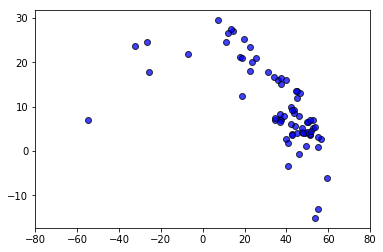

In [47]:
print (database.count())
x_axis = list(database['Latitude'])
y_data = list(database['Temperature'])
plt.xlim(-80,80)
plt.scatter(x_axis, y_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)